# Employee Attrition

### Problem Statement
To determine the best predictors of Employee Attrition with the help of Machine Learning models

### Introduction
Employee attrition occurs when the size of your workforce diminishes over time due to unavoidable factors such as employee resignation for personal or professional reasons. But there could be other reasons for attrition as well, including the lack of professional growth, a hostile work environment, or the department in which the employees are working etc. Few of these factors are considered in the dataset for preditcting whether an employee undergoes attrition or not.

### Dataset
The dataset chosen for this project is IBM HR Analytics Dataset extracted from Kaggle.<br>
Here is the link for the dataset - https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset<br>
Few of the categorical variables are label encoded and the corresponding labels are the following,<br>
Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

Note: This is a fictional data set created by IBM data scientists.


In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# reading csv
df = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Text(0.5, 1.0, 'Frequency Distribution of Ages')

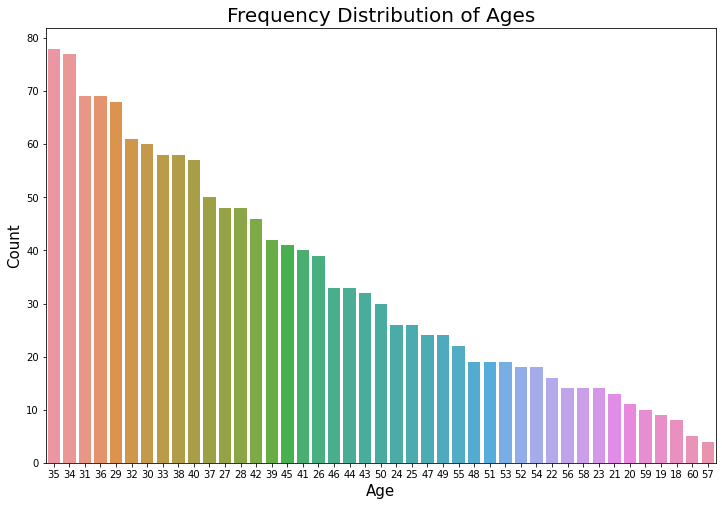

In [6]:
plt.figure(figsize=(12, 8))
sns.countplot(x="Age", data=df, order = df['Age'].value_counts().index)
plt.xlabel('Age',color = 'black', size = 15)
plt.ylabel('Count',color = 'black', size = 15)
plt.title('Frequency Distribution of Ages',color = 'black', size = 20)

Text(0.5, 1.0, 'Attrition count')

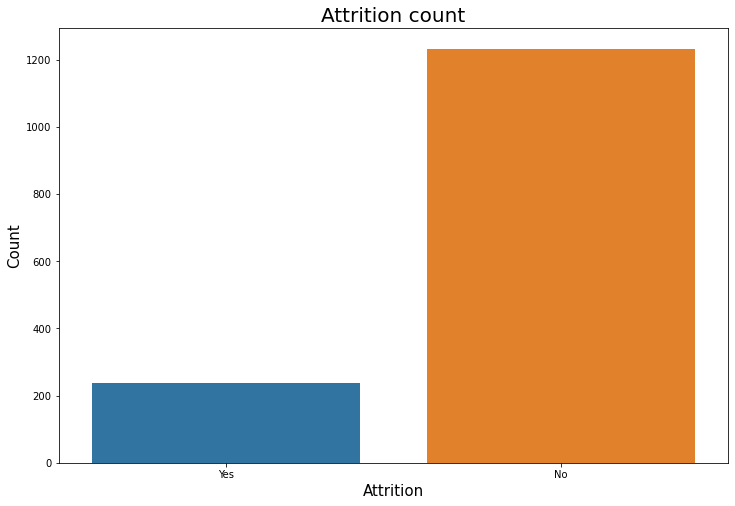

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Attrition',data = df)
plt.xlabel('Attrition',color = 'black', size = 15)
plt.ylabel('Count',color = 'black', size = 15)
plt.title('Attrition count',color = 'black', size = 20)

Text(0.5, 1.0, 'Frequency Distribution of Department with respect to Attrition')

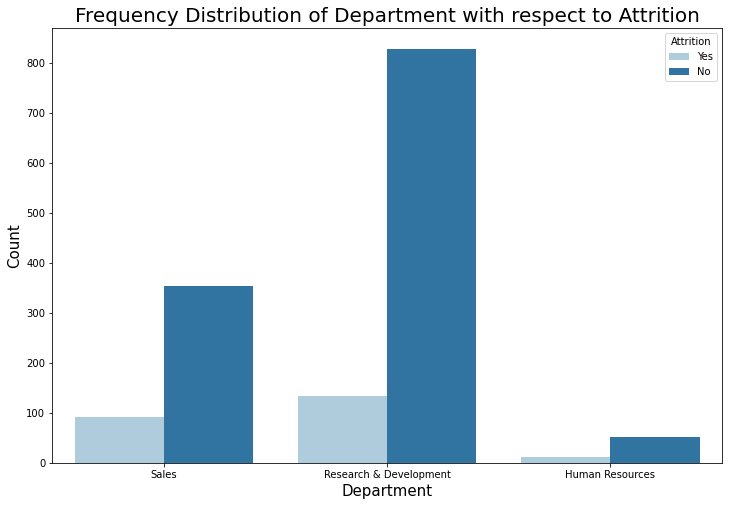

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(x="Department", hue = "Attrition",data=df,palette="Paired")
plt.xlabel('Department',color = 'black', size = 15)
plt.ylabel('Count',color = 'black', size = 15)
plt.title('Frequency Distribution of Department with respect to Attrition',color = 'black', size = 20)

Text(0.5, 1.0, 'Frequency Distribution of Business Travel with respect to Attrition')

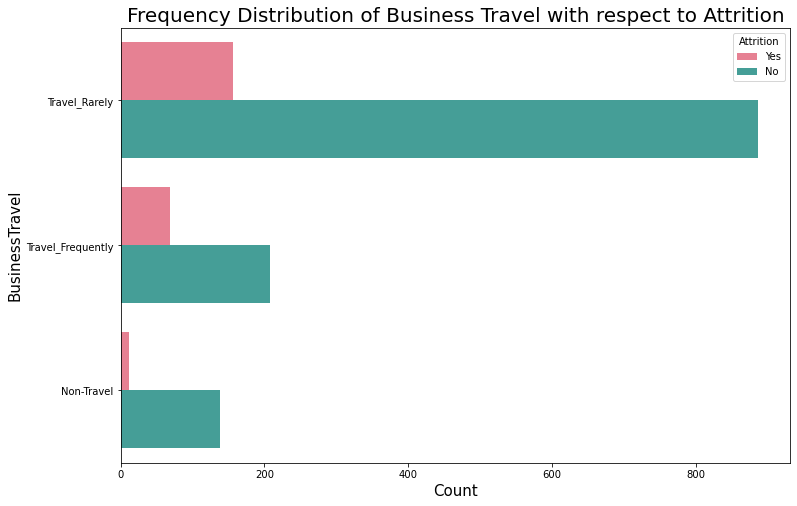

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(y="BusinessTravel", hue = "Attrition",data=df,palette="husl")
plt.xlabel('Count',color = 'black', size = 15)
plt.ylabel('BusinessTravel',color = 'black', size = 15)
plt.title('Frequency Distribution of Business Travel with respect to Attrition',color = 'black', size = 20)

Text(0.5, 1.0, 'Box plot of Age and Attrition')

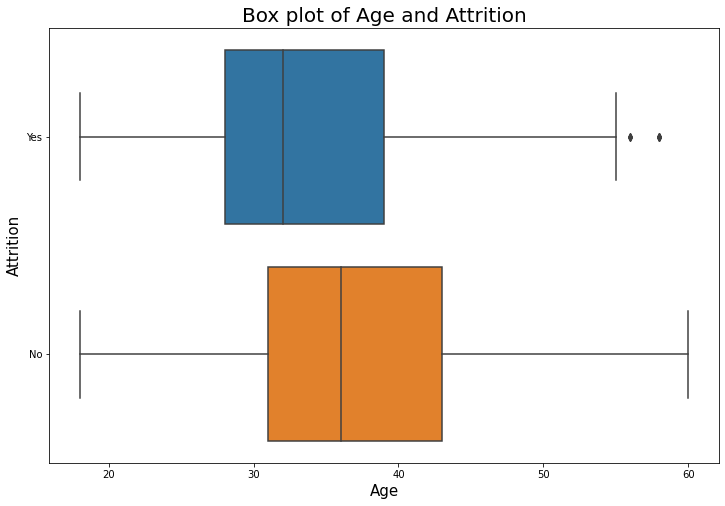

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age',y='Attrition',data=df)
plt.xlabel('Age',color = 'black', size = 15)
plt.ylabel('Attrition',color = 'black', size = 15)
plt.title('Box plot of Age and Attrition',color = 'black', size = 20)

Few of the columns are dropped due to,<br>
Employee Count - There is only one value in the column which is 1<br>
Employee Number - It is an ID field which cannot be a predictor<br>
Over 18 - There is only one value in the column which is Y<br>
Standard Hours - There is only one value in the column which is 80<br>

In [11]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [12]:
# Label encoding the categorical variables
l=LabelEncoder()
df['Attrition']=l.fit_transform(df['Attrition'])
df['BusinessTravel']=l.fit_transform(df['BusinessTravel'])
df['Department']=l.fit_transform(df['Department'])
df['EducationField']=l.fit_transform(df['EducationField'])
df['Gender']=l.fit_transform(df['Gender'])
df['JobRole']=l.fit_transform(df['JobRole'])
df['MaritalStatus']=l.fit_transform(df['MaritalStatus'])
df['OverTime']=l.fit_transform(df['OverTime'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


<AxesSubplot:title={'center':'Correlation Plot'}>

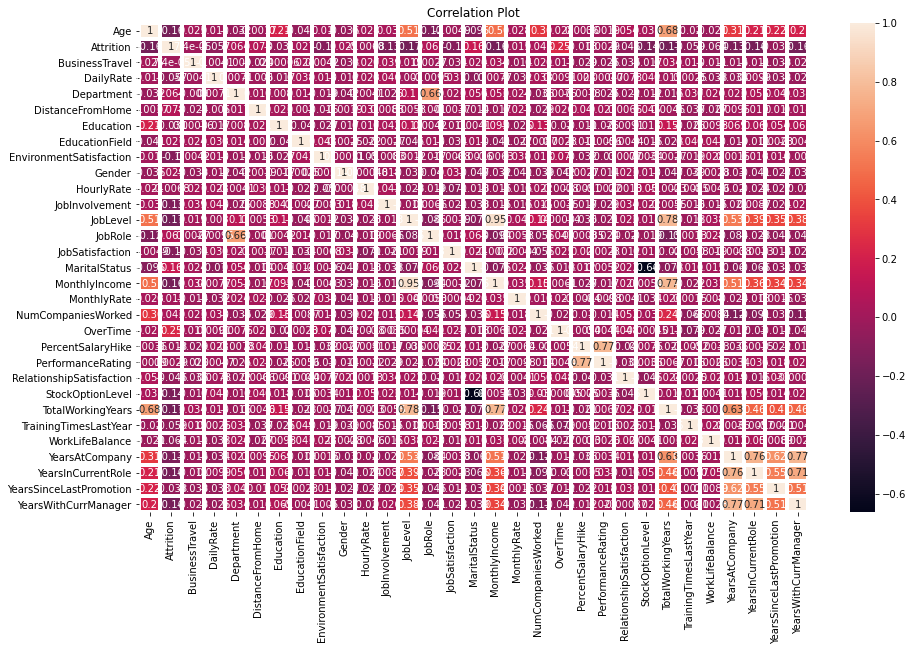

In [13]:
# correlation plot
plt.figure(figsize=(15,9))
plt.title('Correlation Plot')
sns.heatmap(df.corr(), annot=True, linewidth=3)

In [14]:
corrmat = df.corr()
corrmat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [15]:
# Splitting the dataframe into Predictors(X) and Target variable(y)
X = df.drop(['Attrition'],axis=1)
y = df['Attrition']

In [16]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
# Scaling
col_names = X.columns
features = X[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[col_names] = features
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


It is an imbalanced dataset with about 200 'Yes' and 1200 'No' which effects the predictability of the model. Hence, the data needs to be resampled.

In [18]:
# creating sampler object
sampler = RandomOverSampler(sampling_strategy='minority')

In [19]:
X_resampled, y_resampled = sampler.fit_resample(X, y)

In [20]:
# Checking for Multi-collinearity
vif = pd.DataFrame()
vif["variables"] = X_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_resampled.values, i) for i in range(X_resampled.shape[1])]
vif

,variables,VIF
0,Age,2.129480
1,BusinessTravel,1.023187
2,DailyRate,1.055991
3,Department,2.313655
4,DistanceFromHome,1.052314
5,Education,1.070856
6,EducationField,1.040792
7,EnvironmentSatisfaction,1.054694
8,Gender,1.029027
9,HourlyRate,1.043412


In [21]:
# Dropping the Job Level column which has the highest VIF
X_resampled = X_resampled.drop(['JobLevel'],axis=1)

Text(0.5, 1.0, 'Attrition count')

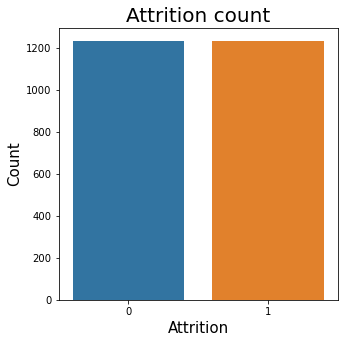

In [22]:
plt.figure(figsize=(5, 5))
sns.countplot(x= y_resampled)
plt.xlabel('Attrition',color = 'black', size = 15)
plt.ylabel('Count',color = 'black', size = 15)
plt.title('Attrition count',color = 'black', size = 20)

In [23]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20,random_state=42)

In [24]:
# Logistic Regression Model
lm=LogisticRegression(class_weight='balanced')
model = lm.fit(X_train, y_train)
pred = model.predict(X_test)

In [25]:
confusion_matrix(y_test, pred)

array([[175,  75],
       [ 47, 197]], dtype=int64)

In [26]:
print("Accuracy:",accuracy_score(y_test, pred))

Accuracy: 0.7530364372469636


In [27]:
print(classification_report(y_test, pred,target_names= df['Attrition'].astype(str).unique()))

              precision    recall  f1-score   support

           1       0.79      0.70      0.74       250
           0       0.72      0.81      0.76       244

    accuracy                           0.75       494
   macro avg       0.76      0.75      0.75       494
weighted avg       0.76      0.75      0.75       494



In [28]:
# Random Forest Classifier
Rf = RandomForestClassifier(n_jobs = -1,random_state = 0)
Rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [29]:
probas = Rf.predict_proba(X_test)
rf_predict = Rf.predict(X_test)

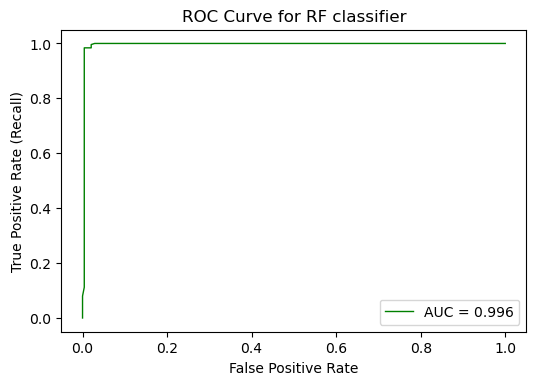

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=100)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()

In [31]:
confusion_matrix(y_test, rf_predict)

array([[238,  12],
       [  1, 243]], dtype=int64)

In [32]:
print("Accuracy:",accuracy_score(y_test, rf_predict))

Accuracy: 0.9736842105263158


In [33]:
print(classification_report(y_test, rf_predict,target_names= df['Attrition'].astype(str).unique()))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97       250
           0       0.95      1.00      0.97       244

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



Text(0.5, 1.0, 'Feature Importance')

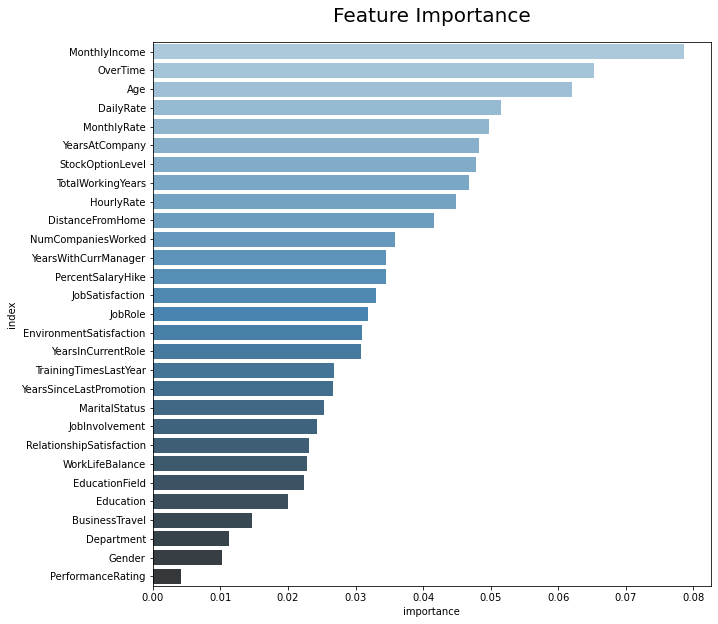

In [34]:
feature_importances = pd.DataFrame(Rf.feature_importances_,
                                   index = X_resampled.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

#Producing a Barplot Visualization
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.barplot(x='importance', y='index', palette='Blues_d',data=feature_importances.reset_index());

plt.title('Feature Importance', fontsize=20, pad=20)

With the built Random Forest Classifier having the best accuracy of 97.6%, the most important feature is the Monthly Income which has the high predictability to predict Employee Attrition